In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [ ]:
print(f'mnist dataset contains {x_train.shape[0]} training images of {x_train.shape[1]}x{x_train.shape[2]} pixels')

mnist dataset contains 60000 training images of 28x28 pixels


Image example:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100 122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252 252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211 252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

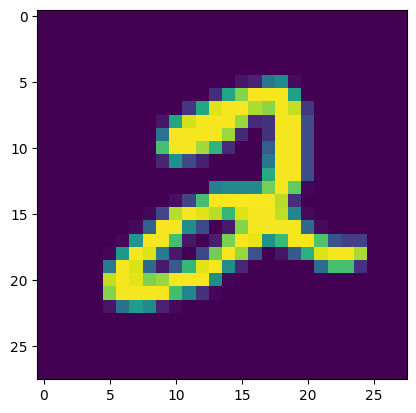

In [ ]:
np.set_printoptions(linewidth=116)
print(f'Image example:\n {x_train[5]}')

plt.imshow(x_train[5])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
                print("\nReached 99% accuracy so cancelling training!")

                # Stop training once the above condition is met
                self.model.stop_training = True

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10)
])

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
callbacks = myCallback()



In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2010 - accuracy: 0.9416 - val_loss: 0.1014 - val_accuracy: 0.9678
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0798 - accuracy: 0.9754 - val_loss: 0.0705 - val_accuracy: 0.9792
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0518 - accuracy: 0.9830 - val_loss: 0.0663 - val_accuracy: 0.9792
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0677 - val_accuracy: 0.9794
Epoch 5/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0286 - accuracy: 0.9906
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0702 - val_accuracy: 0.9797


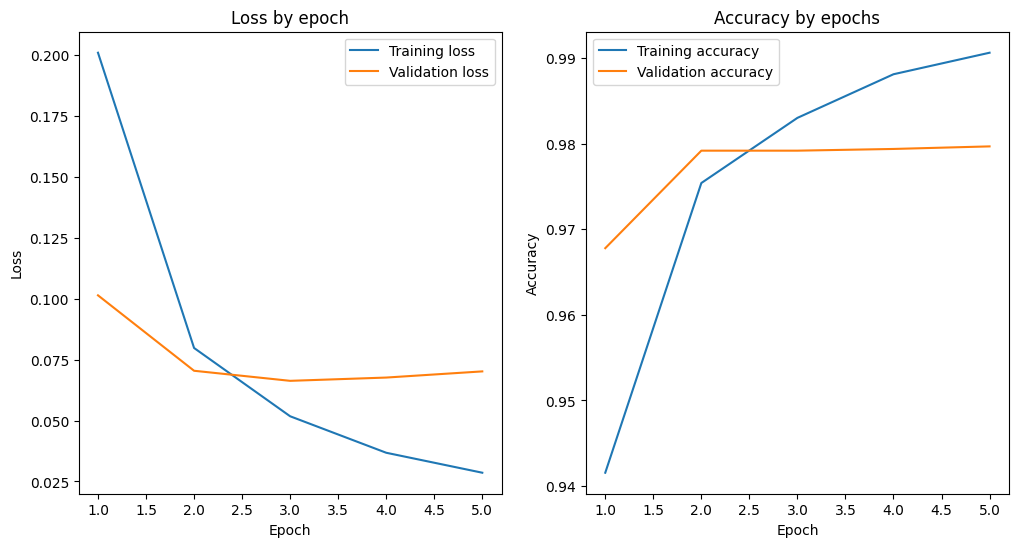

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [x for x in range(1, len(acc)+1)]
plt.figure(figsize=(12, 6))
f1=plt.subplot(1, 2, 2)
f1.plot(epochs, acc, label='Training accuracy')
f1.plot(epochs, val_acc, label='Validation accuracy')
f1.set_xlabel('Epoch')
f1.set_ylabel('Accuracy')
f1.set_title('Accuracy by epochs')
f1.legend()
f2=plt.subplot(1, 2, 1)
f2.plot(epochs, loss, label='Training loss')
f2.plot(epochs, val_loss, label='Validation loss')
f2.set_xlabel('Epoch')
f2.set_ylabel('Loss')
f2.set_title('Loss by epoch')
f2.legend()

In [ ]:
probability_model = tf.keras.models.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [ ]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


[3.6629029e-09 9.9959463e-01 2.1129722e-07 4.3491930e-08 3.0835417e-05 3.0344399e-10 4.8233272e-08 3.6689747e-04
 7.4215259e-06 2.1326082e-08]
1


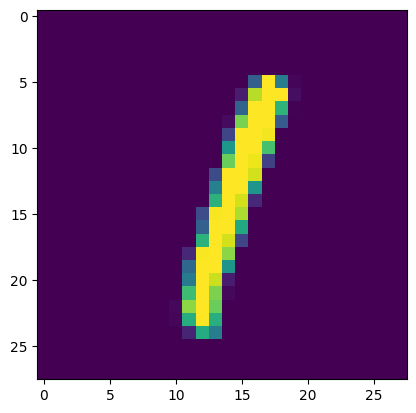

In [ ]:
print(predictions[5])
plt.imshow(x_test[5])
print(y_test[5])